In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

import gc
import datetime

%matplotlib inline

In [130]:
df = pd.read_csv(r"Ecommerce - UK Retailer.csv",encoding=("ISO-8859-1"))

In [131]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Add the new Column- Money Spent.**

In [132]:
df['Money_Spent'] =df['Quantity'] * df['UnitPrice']

In [133]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Money_Spent  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


# 1. Perform Basic EDA

**A. Boxplot – All Numeric Variables**

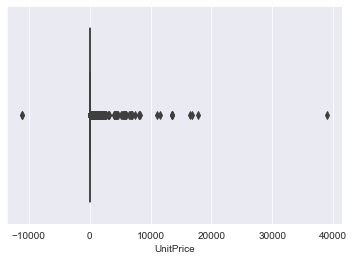

In [135]:
sns.boxplot(df["UnitPrice"]);

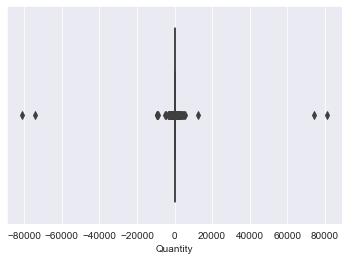

In [136]:
sns.boxplot(df["Quantity"]);

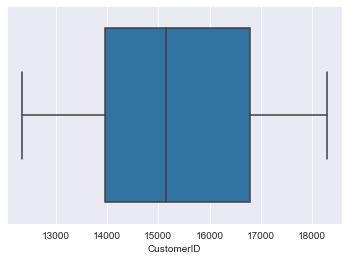

In [137]:
sns.boxplot(df["CustomerID"]);

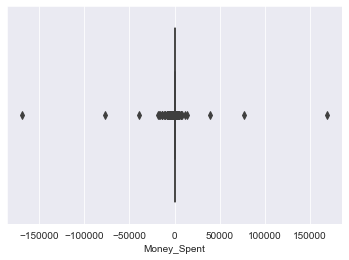

In [138]:
sns.boxplot(df["Money_Spent"]);

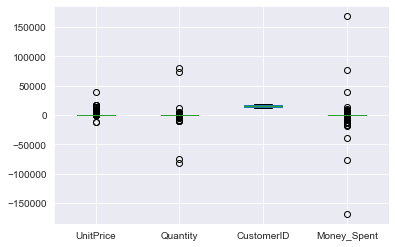

In [139]:
df.boxplot(column=["UnitPrice","Quantity","CustomerID","Money_Spent"]);

**B. Histogram – All Numeric Variables**

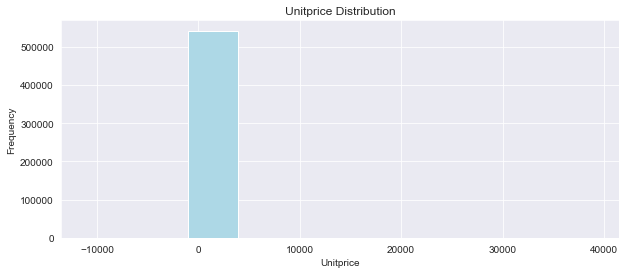

In [140]:
plt.figure(figsize=(10,4))

plt.title("Unitprice Distribution")

plt.xlabel("Unitprice")
plt.ylabel("Frequency")

plt.hist(df['UnitPrice'],color='lightblue')
plt.show()

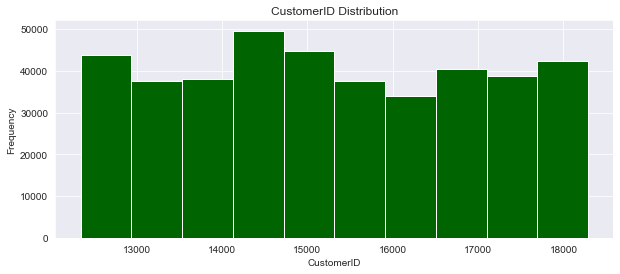

In [141]:
plt.figure(figsize=(10,4))

plt.title("CustomerID Distribution")

plt.xlabel("CustomerID")
plt.ylabel("Frequency")

plt.hist(df['CustomerID'],color='darkgreen')
plt.show()

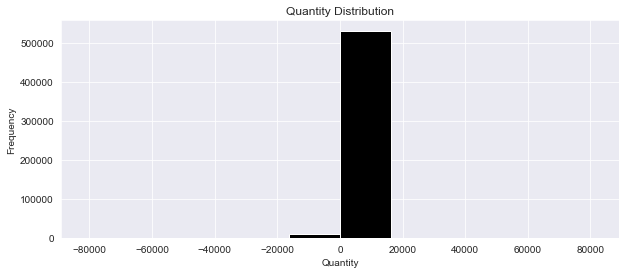

In [142]:
plt.figure(figsize=(10,4))

plt.title("Quantity Distribution")

plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.hist(df['Quantity'],color='black')
plt.show()

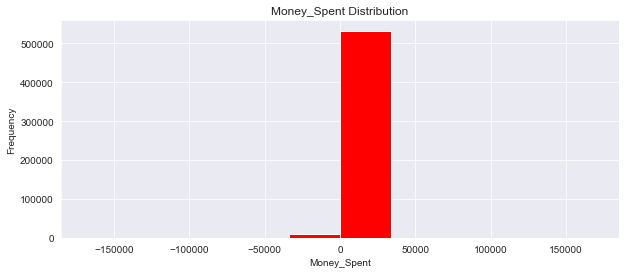

In [143]:
plt.figure(figsize=(10,4))

plt.title("Money_Spent Distribution")

plt.xlabel("Money_Spent")
plt.ylabel("Frequency")

plt.hist(df['Money_Spent'],color='red')
plt.show()

**C. Distribution Plot – All Numeric Variables**

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

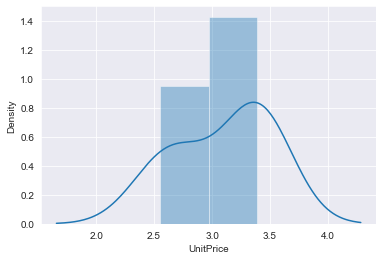

In [144]:
sns.distplot((df.head()['UnitPrice']))

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

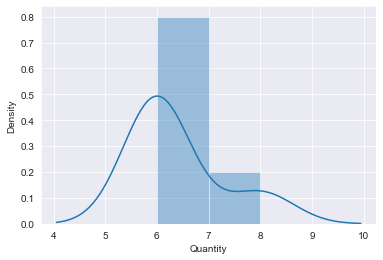

In [145]:

sns.distplot((df.head()['Quantity']))

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

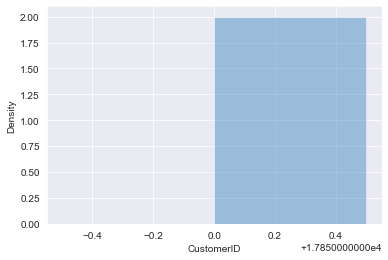

In [146]:
sns.distplot((df.head()['CustomerID']))

<AxesSubplot:xlabel='Money_Spent', ylabel='Density'>

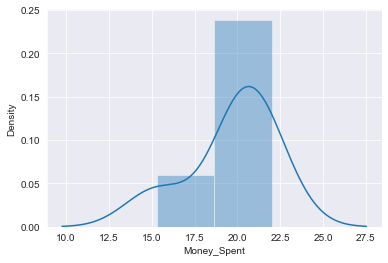

In [147]:
sns.distplot((df.head()['Money_Spent']))

**D. Aggregation for all numerical Columns**

In [148]:
df.aggregate({"Quantity" : ['mean','std','median','count','sum','max','min'], 
                   "UnitPrice" : ['mean','std','median','count','sum','max','min'],
                  "CustomerID" : ['mean','std','median','count','sum','max','min'],
                "Money_Spent" : ['mean','std','median','count','sum','max','min']}).round(2)

,Quantity,UnitPrice,CustomerID,Money_Spent
mean,9.55,4.61,1.528769e+04,17.99
std,218.08,96.76,1.713600e+03,378.81
median,3.00,2.08,1.515200e+04,9.75
count,541909.00,541909.00,4.068290e+05,541909.00
sum,5176450.00,2498803.97,6.219476e+09,9747747.93
max,80995.00,38970.00,1.828700e+04,168469.60
min,-80995.00,-11062.06,1.234600e+04,-168469.60


**E. Unique Values across all columns**

In [149]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
Money_Spent     6204
dtype: int64

**F. Duplicate values across all columns**

In [150]:
duplicate =df[df.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money_Spent
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,1.25
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2.10
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,4.95
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom,2.95
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom,0.39
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom,2.49
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom,1.95
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom,2.10


**G. Correlation – Heatmap - All Numeric Variables**

In [151]:
df.corr()

,Quantity,UnitPrice,CustomerID,Money_Spent
Quantity,1.000000,-0.001235,-0.003600,0.886681
UnitPrice,-0.001235,1.000000,-0.004560,-0.162029
CustomerID,-0.003600,-0.004560,1.000000,-0.002274
Money_Spent,0.886681,-0.162029,-0.002274,1.000000


<AxesSubplot:>

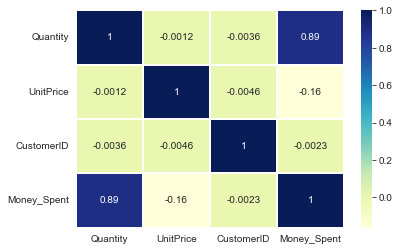

In [152]:
sns.heatmap(df.corr(), annot = True,linewidths=2,cmap='YlGnBu')

**H. Regression Plot - All Numeric Variables**

Text(0.5, 1.0, 'UnitPrice vs Quantity')

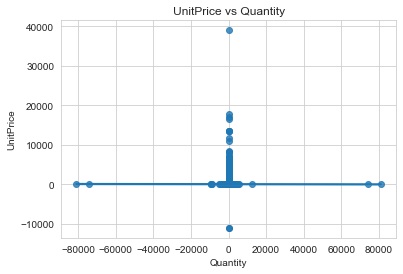

In [153]:
sns.set_style('whitegrid')
sns.regplot(data=df, x='Quantity',y='UnitPrice')
plt.title('UnitPrice vs Quantity')

Text(0.5, 1.0, 'UnitPrice vs CustomerID')

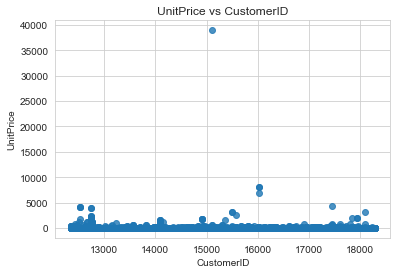

In [154]:
sns.set_style('whitegrid')
sns.regplot(data=df, x='CustomerID',y='UnitPrice')
plt.title('UnitPrice vs CustomerID')

Text(0.5, 1.0, 'UnitPrice vs Money_Spent')

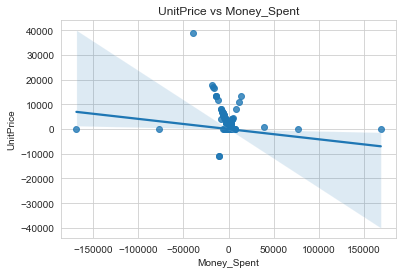

In [155]:
sns.set_style('whitegrid')
sns.regplot(data=df, x='Money_Spent',y='UnitPrice')
plt.title('UnitPrice vs Money_Spent')

Text(0.5, 1.0, 'Quantity vs CustomerID')

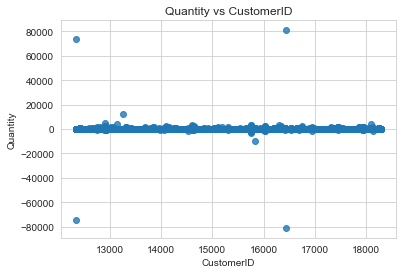

In [156]:
sns.set_style('whitegrid')
sns.regplot(data=df, x='CustomerID',y='Quantity')
plt.title('Quantity vs CustomerID')

Text(0.5, 1.0, 'Quantity vs Money_Spent')

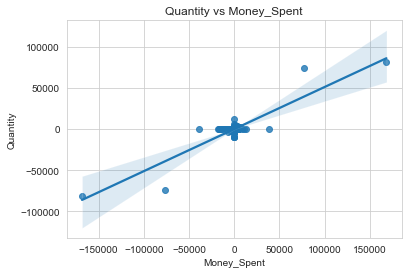

In [157]:
sns.set_style('whitegrid')
sns.regplot(data=df, x='Money_Spent',y='Quantity')
plt.title('Quantity vs Money_Spent')

Text(0.5, 1.0, 'CustomerID vs Money_Spent')

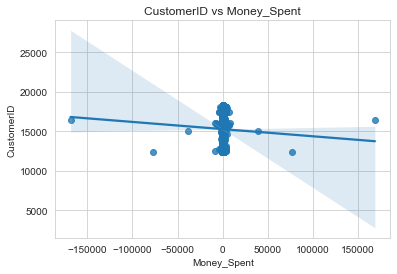

In [158]:
sns.set_style('whitegrid')
sns.regplot(data=df, x='Money_Spent',y='CustomerID')
plt.title('CustomerID vs Money_Spent')

**I. Bar Plot – Every Categorical Variable vs every Numerical Variable**

In [159]:
df.groupby('Country')['Quantity'].mean()

Country
Australia               66.444003
Austria                 12.037406
Bahrain                 13.684211
Belgium                 11.189947
Brazil                  11.125000
Canada                  18.298013
Channel Islands         12.505277
Cyprus                  10.155949
Czech Republic          19.733333
Denmark                 21.048843
EIRE                    17.403245
European Community       8.147541
Finland                 15.346763
France                  12.911067
Germany                 12.369458
Greece                  10.657534
Hong Kong               16.559028
Iceland                 13.505495
Israel                  14.656566
Italy                    9.961395
Japan                   70.441341
Lebanon                  8.577778
Lithuania               18.628571
Malta                    7.433071
Netherlands             84.406580
Norway                  17.722836
Poland                  10.712610
Portugal                10.651745
RSA                      6.068966
Saudi 

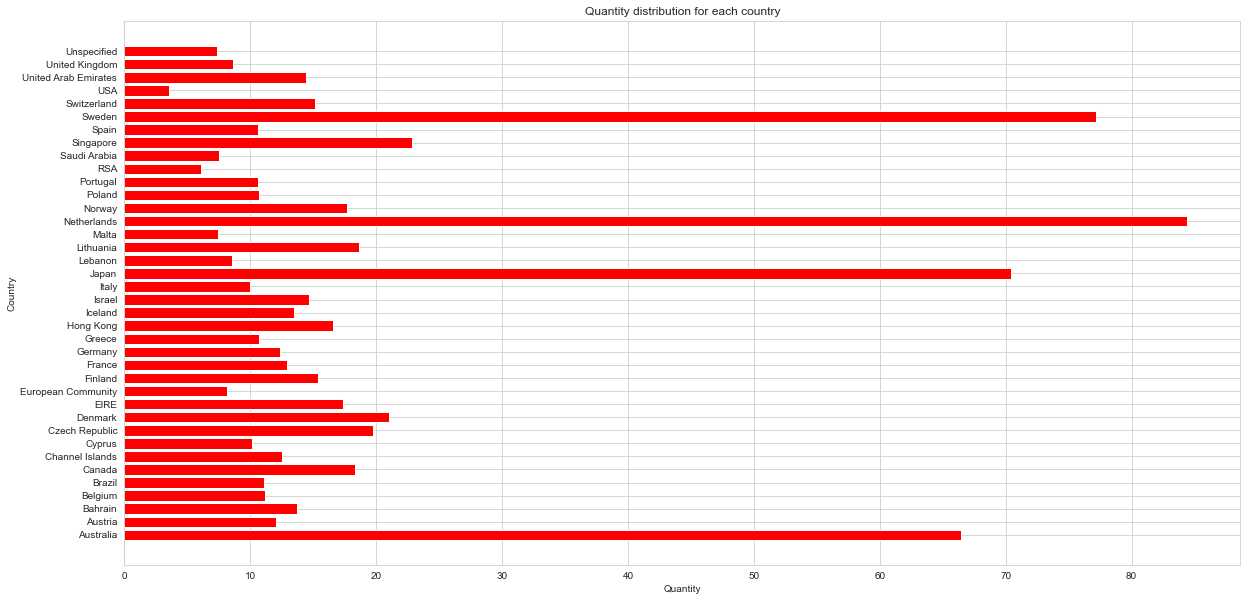

In [160]:
data_country_quantity =df.groupby('Country')['Quantity'].mean()

x = data_country_quantity.values.tolist()
y = data_country_quantity.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Quantity")
plt.ylabel("Country")

plt.title("Quantity distribution for each country")

plt.barh(y,x,color=['r'])
plt.show()

In [161]:
df.groupby('Country')['UnitPrice'].mean()

Country
Australia                 3.220612
Austria                   4.243192
Bahrain                   4.556316
Belgium                   3.644335
Brazil                    4.456250
Canada                    6.030331
Channel Islands           4.932124
Cyprus                    6.302363
Czech Republic            2.938333
Denmark                   3.256941
EIRE                      5.911077
European Community        4.820492
Finland                   5.448705
France                    5.028864
Germany                   3.966930
Greece                    4.885548
Hong Kong                42.505208
Iceland                   2.644011
Israel                    3.633131
Italy                     4.831121
Japan                     2.276145
Lebanon                   5.387556
Lithuania                 2.841143
Malta                     5.244173
Netherlands               2.738317
Norway                    6.012026
Poland                    4.170880
Portugal                  8.582976
RSA         

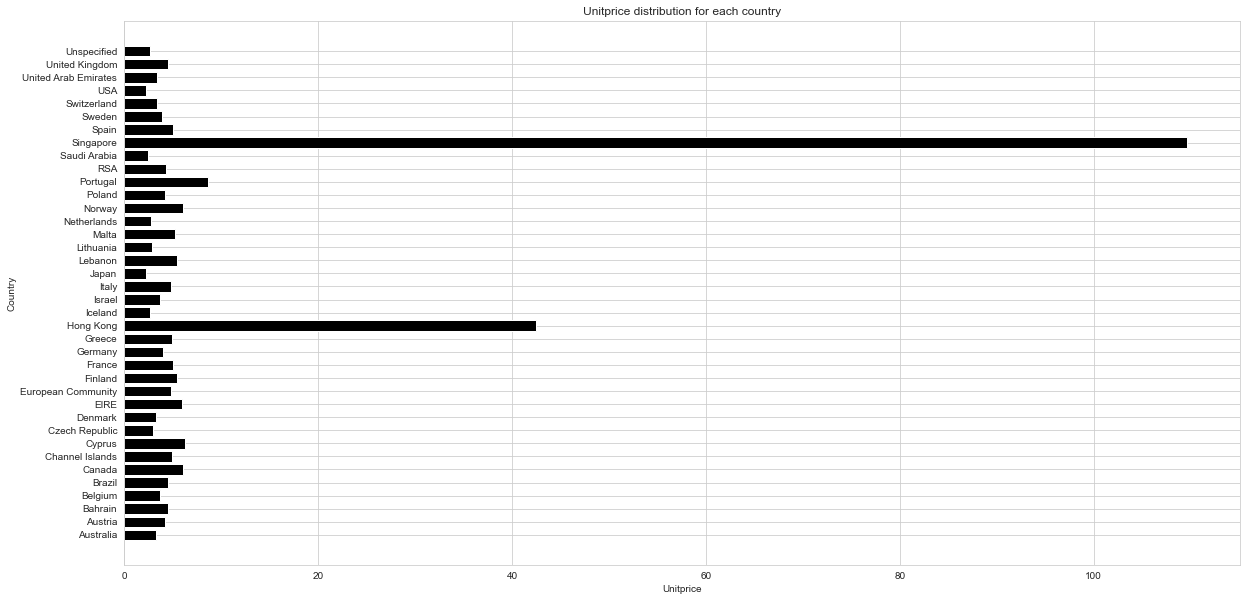

In [162]:
data_country_unitprice = df.groupby('Country')['UnitPrice'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Unitprice")
plt.ylabel("Country")

plt.title("Unitprice distribution for each country")

plt.barh(y,x,color=['black'])
plt.show()

In [163]:
df.groupby('Country')['Money_Spent'].mean()

Country
Australia               108.877895
Austria                  25.322494
Bahrain                  28.863158
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.499063
Cyprus                   20.813971
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     32.122599
European Community       21.176230
Finland                  32.124806
France                   23.069288
Germany                  23.348943
Greece                   32.263836
Hong Kong                35.128611
Iceland                  23.681319
Israel                   26.625657
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal                 19.333127
RSA         

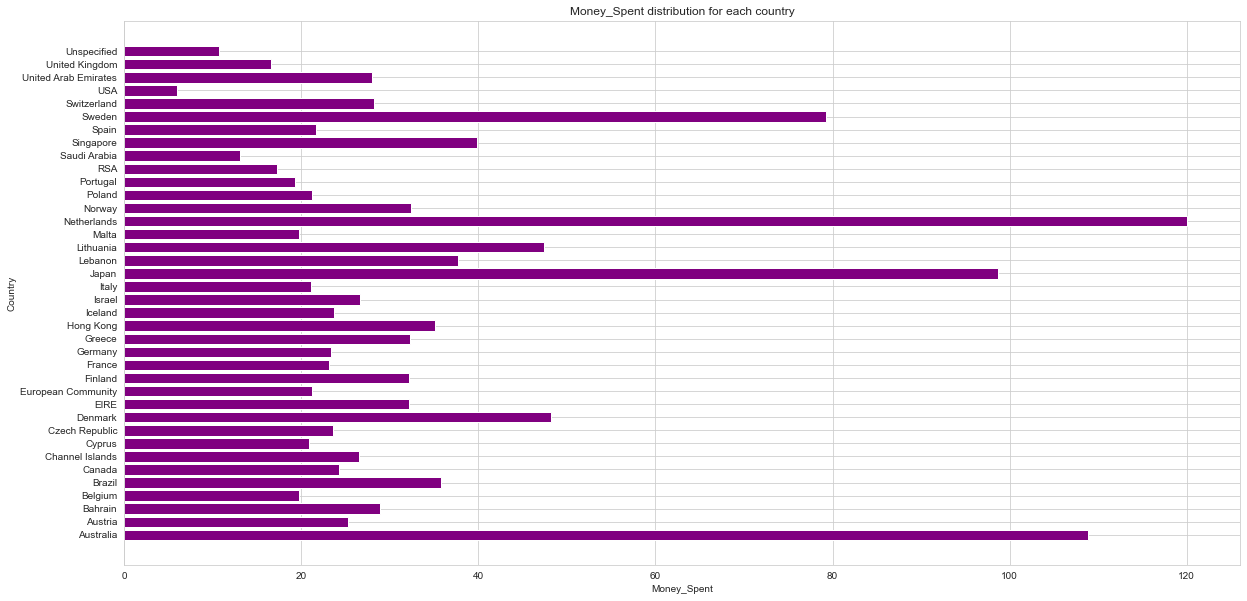

In [164]:
data_country_unitprice = df.groupby('Country')['Money_Spent'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Money_Spent")
plt.ylabel("Country")

plt.title("Money_Spent distribution for each country")

plt.barh(y,x,color=['purple'])
plt.show()

In [165]:
df.groupby('Country')['CustomerID'].mean()

Country
Australia               12464.656076
Austria                 12521.451372
Bahrain                 12354.529412
Belgium                 12430.298695
Brazil                  12769.000000
Canada                  17321.079470
Channel Islands         14888.151715
Cyprus                  12404.951768
Czech Republic          12781.000000
Denmark                 12536.591260
EIRE                    14748.396126
European Community      15108.000000
Finland                 12517.012950
France                  12677.995996
Germany                 12646.139336
Greece                  13757.424658
Hong Kong                        NaN
Iceland                 12347.000000
Israel                  12657.868000
Italy                   12648.397260
Japan                   12757.798883
Lebanon                 12764.000000
Lithuania               15332.000000
Malta                   16996.031496
Netherlands             14420.302826
Norway                  12437.984346
Poland                  12733.

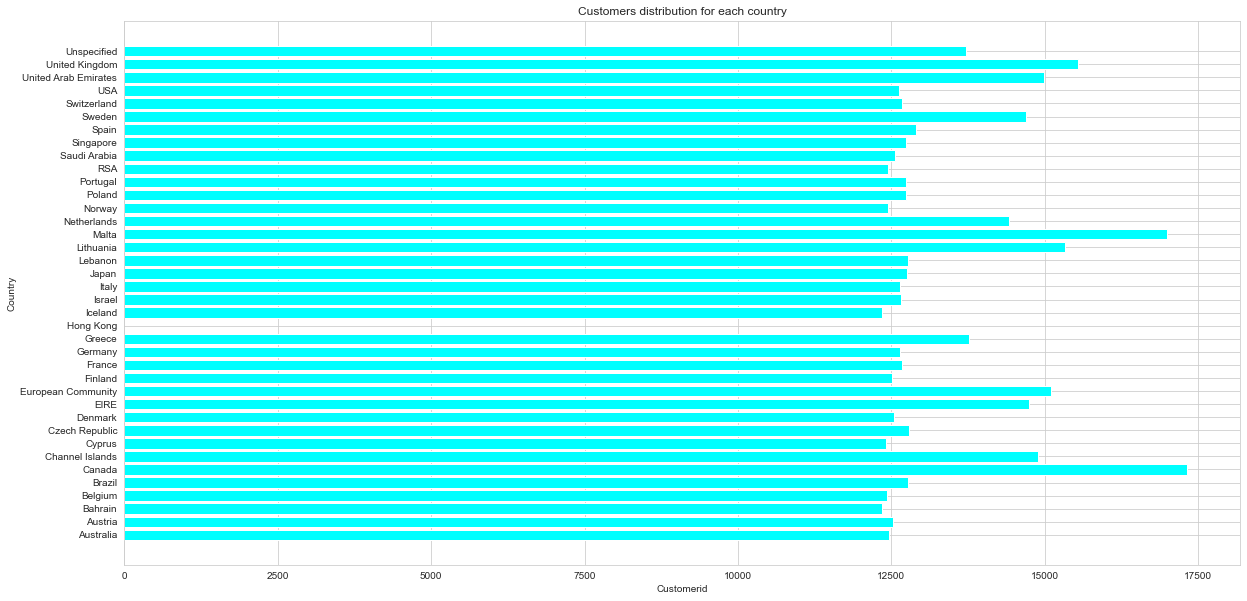

In [166]:
data_country_unitprice = df.groupby('Country')['CustomerID'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Customerid")
plt.ylabel("Country")

plt.title("Customers distribution for each country")

plt.barh(y,x,color=['aqua'])
plt.show()

**J. Pair plot - All Numeric Variables**

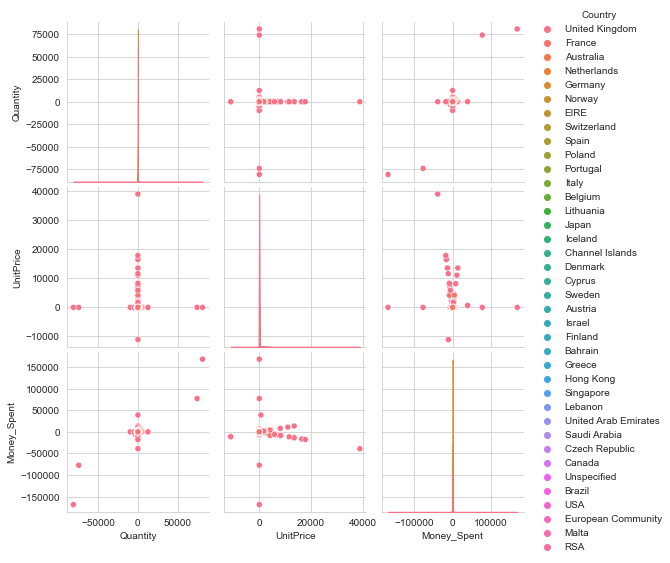

In [168]:
sns.pairplot(df,hue="Country",vars=["Quantity","UnitPrice","Money_Spent"])
plt.show()

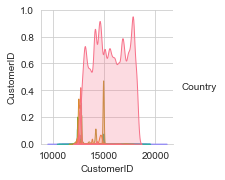

In [169]:
sns.pairplot(df,hue="Country",vars=["CustomerID"])
plt.show()

**Add the Columns Month,Day,Hour**

In [170]:
df['month'] = list(pd.DatetimeIndex(df['InvoiceDate']).month)
df['day'] = list(pd.DatetimeIndex(df['InvoiceDate']).day)
df['hour'] = list(pd.DatetimeIndex(df['InvoiceDate']).hour)

In [171]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money_Spent,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,1,8


**K. Line chart to show the trend of data - All Numeric/Date Variables**

<AxesSubplot:xlabel='month', ylabel='Quantity'>

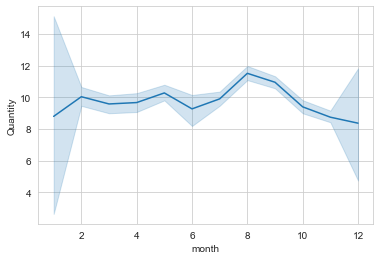

In [172]:
sns.lineplot(data=df, x="month", y="Quantity")

<AxesSubplot:xlabel='month', ylabel='CustomerID'>

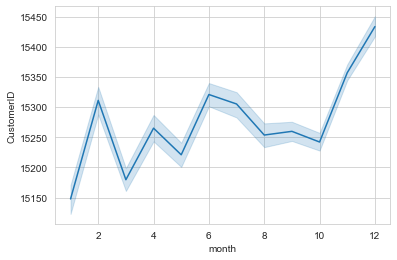

In [173]:
sns.lineplot(data=df, x="month", y="CustomerID")

<AxesSubplot:xlabel='month', ylabel='UnitPrice'>

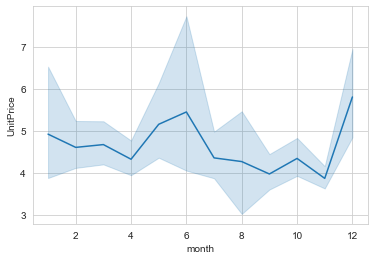

In [174]:
sns.lineplot(data=df, x="month", y="UnitPrice")

<AxesSubplot:xlabel='month', ylabel='Money_Spent'>

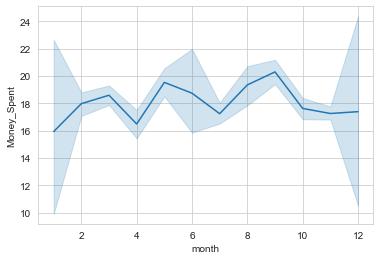

In [175]:
sns.lineplot(data=df, x="month", y="Money_Spent")

**L. Plot the skewness - All Numeric Variables**

In [176]:
df['Skewed Data'] = pd.DataFrame(df.skew(axis=1,skipna=True))

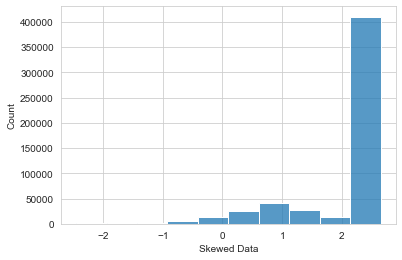

In [177]:
sns.histplot(df['Skewed Data'],bins=10);

<AxesSubplot:xlabel='Skewed Data', ylabel='Density'>

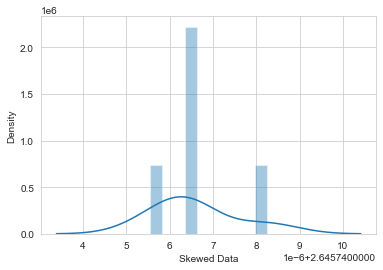

In [178]:
sns.distplot(df['Skewed Data'].head(), bins=10)

# 2. Check for missing values in all columns and replace them with the appropriate metric(Mean/Median/Mode)

In [179]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Money_Spent         0
month               0
day                 0
hour                0
Skewed Data         0
dtype: int64

In [180]:
df.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [181]:
df.Description.fillna(df.Description.mode()[0],inplace = True)

In [182]:
df.CustomerID.mean()

15287.690570239585

In [183]:
df['CustomerID'].fillna(df['CustomerID'].mean(),inplace=True)

In [184]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Money_Spent    0
month          0
day            0
hour           0
Skewed Data    0
dtype: int64

# 3. Remove duplicate rows 


In [185]:
df.duplicated().sum()

5268

In [186]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money_Spent,month,day,hour,Skewed Data
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,1.25,12,1,11,2.645748
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2.10,12,1,11,2.645749
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2.95,12,1,11,2.645749
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,4.95,12,1,11,2.645749
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom,2.95,12,1,11,2.645749
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom,0.39,12,9,11,2.645746
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom,2.49,12,9,11,2.645748
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom,1.95,12,9,11,2.645747
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom,2.10,12,9,11,2.645747


In [187]:
df=df.drop_duplicates(keep=False)

In [188]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money_Spent,month,day,hour,Skewed Data


# 4. Remove rows which have negative values in Quantity column

In [189]:
df= df[df.Quantity > 0]

In [190]:
df['Quantity'].describe().round(2)

count    521207.00
mean         10.80
std         158.31
min           1.00
25%           1.00
50%           4.00
75%          12.00
max       80995.00
Name: Quantity, dtype: float64

# 5. Add the columns - Month, Day and Hour for the invoice 

In [193]:
df['month'] = list(pd.DatetimeIndex(df['InvoiceDate']).month)
df['day'] = list(pd.DatetimeIndex(df['InvoiceDate']).day)
df['hour'] = list(pd.DatetimeIndex(df['InvoiceDate']).hour)

In [194]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money_Spent,month,day,hour,Skewed Data
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12,1,8,2.645748
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,1,8,2.645746
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,12,1,8,2.645746
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,1,8,2.645746
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12,1,8,2.645746


# 6. How many orders made by the customers? 


In [195]:
df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].count().head()

,CustomerID,Country,Quantity
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


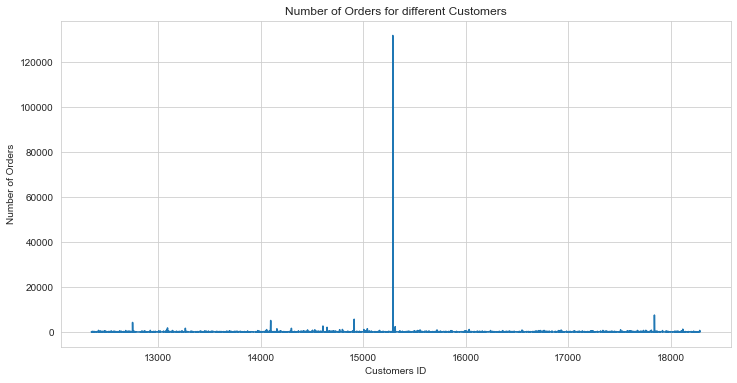

In [196]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].count()

plt.subplots(figsize=(12,6))
plt.plot(orders.CustomerID, orders.Quantity)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders 


In [197]:
print("Top 5 customers with highest number of orders are : ")
orders.sort_values(by='Quantity', ascending=False).head()

Top 5 customers with highest number of orders are : 


,CustomerID,Country,Quantity
2176,15287.69057,United Kingdom,131892
4028,17841.00000,United Kingdom,7523
1888,14911.00000,EIRE,5667
1298,14096.00000,United Kingdom,5111
334,12748.00000,United Kingdom,4243


# 8. How much money spent by the customers? 


In [198]:
money_spent =df.groupby(by=['CustomerID','Country'], as_index=False)['Money_Spent'].sum()
money_spent.head()

,CustomerID,Country,Money_Spent
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1797.24
3,12349.0,Italy,1757.55
4,12350.0,Norway,334.40


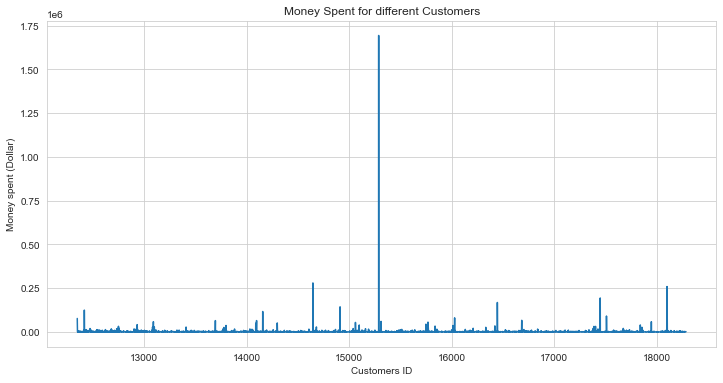

In [199]:
money_spent =df.groupby(by=['CustomerID','Country'], as_index=False)['Money_Spent'].sum()

plt.subplots(figsize=(12,6))
plt.plot(money_spent.CustomerID, money_spent.Money_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent 

In [200]:
print("TOP 5 customers with highest money spent are : ")
money_spent.sort_values(by='Money_Spent',ascending=False).head().round(2)

TOP 5 customers with highest money spent are : 


,CustomerID,Country,Money_Spent
2176,15287.69,United Kingdom,1694485.90
1698,14646.00,Netherlands,280206.02
4219,18102.00,United Kingdom,259657.30
3746,17450.00,United Kingdom,194230.79
3026,16446.00,United Kingdom,168472.50


# 10. How many orders per month?

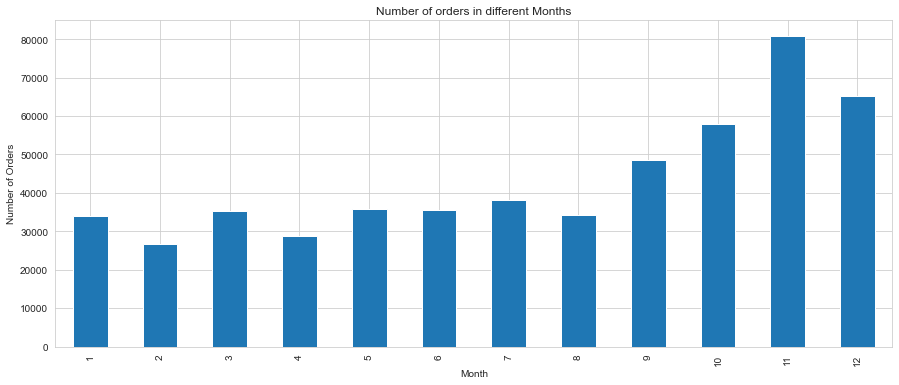

In [201]:
order = df.groupby(by=['month'])['Quantity'].count().sort_index()
order.plot(kind = 'bar',figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of orders in different Months')
plt.show()

# 11. How many orders per day? 


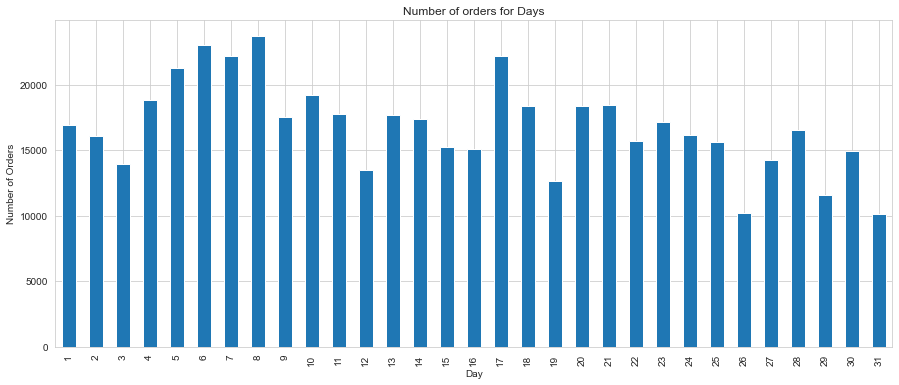

In [202]:
order = df.groupby(by=['day'])['Quantity'].count().sort_index()
order.plot(kind = 'bar',figsize=(15,6))
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('Number of orders for Days')

plt.show()


# 12. How many orders per hour? 

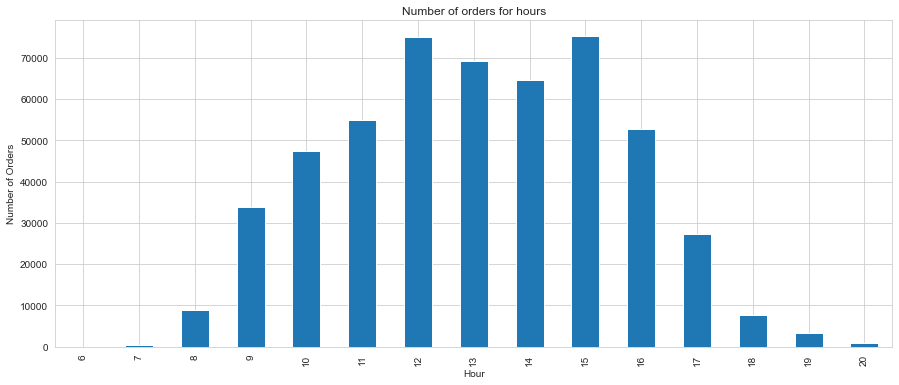

In [203]:
order = df.groupby(by=['hour'])['Quantity'].count().sort_index()
order.plot(kind = 'bar',figsize=(15,6))
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of orders for hours')
plt.show()

# 13. How many orders for each country? 

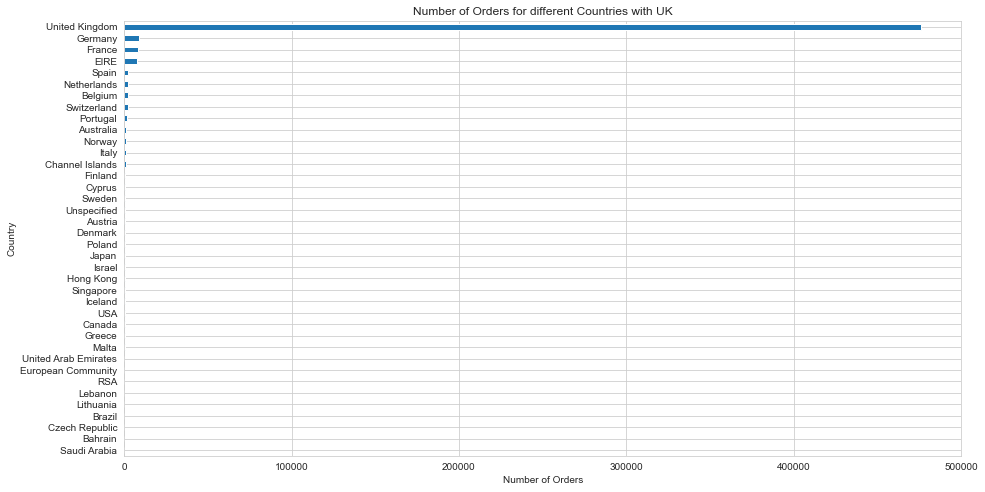

In [204]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries with UK')
plt.show()

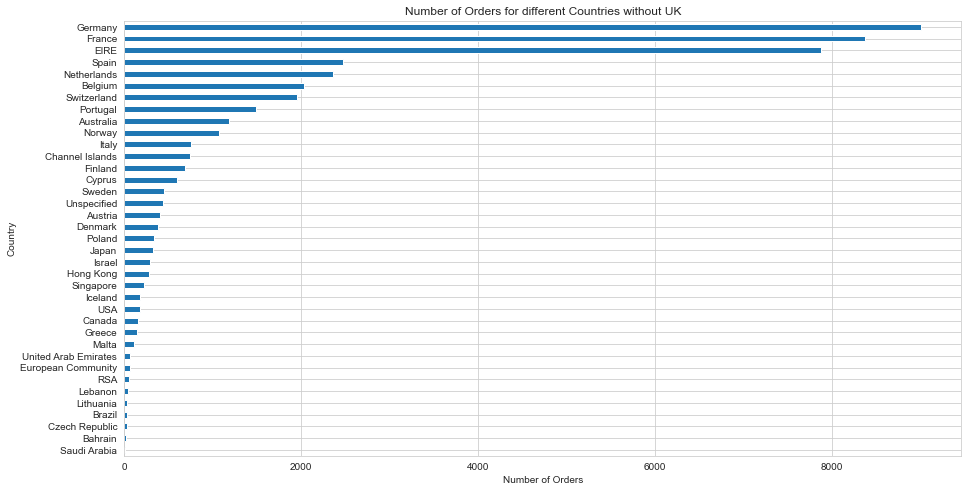

In [205]:
group_country_orders =df.groupby('Country')['InvoiceNo'].count().sort_values()

del group_country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries without UK')
plt.show()

# 14. Orders trend across months 


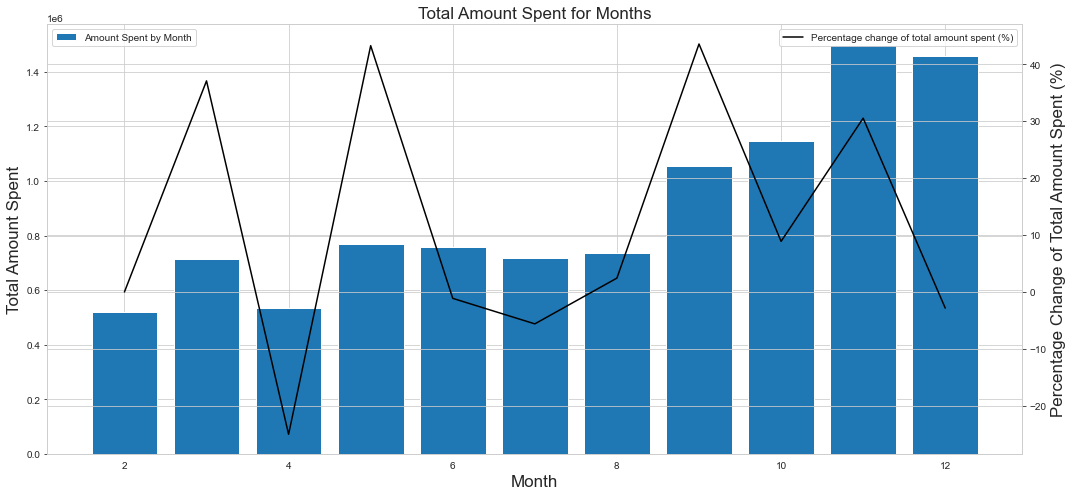

In [206]:
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=17)
x1.set_ylabel('Total Amount Spent',fontsize=17)
x1.set_title('Total Amount Spent for Months',fontsize=17)

x1.bar(df.groupby(by=['month'])['Money_Spent'].sum().index.tolist()[1:],
        df.groupby(by=['month'])['Money_Spent'].sum()[1:],
        #alpha=0.85,
        label='Amount Spent by Month')

x2 = x1.twinx()

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=17)

x2.plot(df.groupby(by=['month'])['Money_Spent'].sum().index.tolist()[1:], 
         df.groupby(by=['month'])['Money_Spent'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='black')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

# 15. How much money spent by each country? 

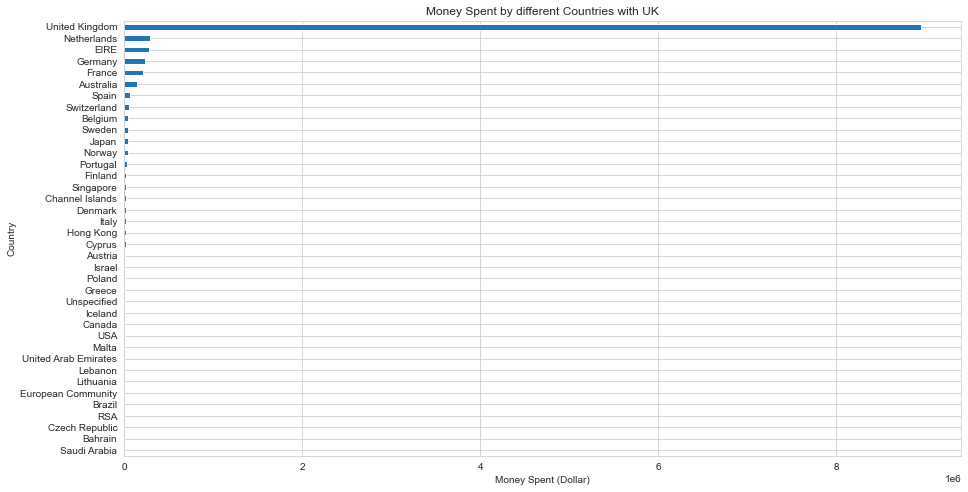

In [207]:
group_country_money_spent = df.groupby('Country')['Money_Spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_money_spent.plot(kind = 'barh')
plt.xlabel('Money Spent (Dollar)')
plt.ylabel('Country')
plt.title('Money Spent by different Countries with UK')
plt.show()